In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the path to your CSV file
csv_path = 'D:/4_summersemester2023/1_ML/Slides_exercises_Project/Project_Sentiment Analysis in Twitter/tweets_train.csv'

# Load the training data from the CSV file
df = pd.read_csv(csv_path)

In [3]:
df.head()

,id,text,type,author_id,possibly_sensitive,retweet_count,quote_count,reply_count,like_count,followers_count,following_count,tweet_count,listed_count,words,score_compound,sentiment
0,1532325760148590593,@xbresson British Alps :-),replied_to,62044012,False,0,0,1,2,33022,3383,5246,359,"['british', 'alps']",0.0000,neutral
1,1312410689059913731,RT @Aistats2020: Videos presentations of paper...,retweeted,1290762290224984064,False,52,0,0,0,17570,541,703,222,"['videos', 'presentations', 'papers', 'keynote...",0.0000,neutral
2,1564467011781926913,I hope I would be able to talk more about this...,quoted,3363584909,False,1,0,0,3,65506,113,15406,856,"['hope', 'would', 'able', 'talk', 'balcony', '...",0.4862,neutral
3,1473395733344788481,RT @dlbcnai: Keynote by Joan Bruna (@joanbruna...,retweeted,1071640880,False,35,0,0,0,21847,555,1346,264,"['keynote', 'joan', 'bruna', 'geometric', 'dee...",0.3612,neutral
4,1611495430843502593,@annargrs @Michael_J_Black @AllenHW0 @CSProfKG...,replied_to,48008938,False,0,0,1,5,427851,582,12949,6488,"['process', 'science', 'relies', 'much', 'basi...",-0.3182,neutral


In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8000 non-null   int64  
 1   text                8000 non-null   object 
 2   type                8000 non-null   object 
 3   author_id           8000 non-null   int64  
 4   possibly_sensitive  8000 non-null   bool   
 5   retweet_count       8000 non-null   int64  
 6   quote_count         8000 non-null   int64  
 7   reply_count         8000 non-null   int64  
 8   like_count          8000 non-null   int64  
 9   followers_count     8000 non-null   int64  
 10  following_count     8000 non-null   int64  
 11  tweet_count         8000 non-null   int64  
 12  listed_count        8000 non-null   int64  
 13  words               8000 non-null   object 
 14  score_compound      8000 non-null   float64
 15  sentiment           8000 non-null   object 
dtypes: boo

In [5]:
#checking Columns
df.columns

Index(['id', 'text', 'type', 'author_id', 'possibly_sensitive',
       'retweet_count', 'quote_count', 'reply_count', 'like_count',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'words', 'score_compound', 'sentiment'],
      dtype='object')

In [6]:
#For sentiment analysis we only want text and sentiment
new_df=df[['text','sentiment']]

In [7]:
new_df.head()

,text,sentiment
0,@xbresson British Alps :-),neutral
1,RT @Aistats2020: Videos presentations of paper...,neutral
2,I hope I would be able to talk more about this...,neutral
3,RT @dlbcnai: Keynote by Joan Bruna (@joanbruna...,neutral
4,@annargrs @Michael_J_Black @AllenHW0 @CSProfKG...,neutral


In [8]:
#Stastastical analysis of dataset
new_df.describe().T

,count,unique,top,freq
text,8000,7985,"RT @mhelft: In Annual Letter, Sundar Pichai Sa...",2
sentiment,8000,3,neutral,5290


In [9]:
#checking Unique values
new_df.sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [10]:
#checking Shape of the dataset
new_df.shape

(8000, 2)

In [11]:
# Convert to lower case
new_df["text"] = new_df["text"].str.lower()
new_df['text']

0                              @xbresson british alps :-)
1       rt @aistats2020: videos presentations of paper...
2       i hope i would be able to talk more about this...
3       rt @dlbcnai: keynote by joan bruna (@joanbruna...
4       @annargrs @michael_j_black @allenhw0 @csprofkg...
                              ...                        
7995                                       @aheid netflix
7996    rt @deepmind: how could ai become as curious a...
7997    rt @mmbronstein: an early version of the intro...
7998    @kidoman_ i just finished the expanse book 5 l...
7999              rt @pervognsen: better late than never!
Name: text, Length: 8000, dtype: object

In [12]:
# Remove punctuations
new_df['text'][0]

'@xbresson british alps :-)'

In [13]:
new_df['text'] = new_df['text'].str.replace('http\S+|www.\S+', '', case=False)

In [14]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [15]:
new_df["clean_text"] = new_df['text'].apply(remove_punctuations)

In [16]:
new_df["clean_text"]

0                                  xbresson british alps 
1       rt aistats2020 videos presentations of papers ...
2       i hope i would be able to talk more about this...
3       rt dlbcnai keynote by joan bruna joanbruna geo...
4       annargrs michaeljblack allenhw0 csprofkgd no t...
                              ...                        
7995                                        aheid netflix
7996    rt deepmind how could ai become as curious as ...
7997    rt mmbronstein an early version of the introdu...
7998    kidoman i just finished the expanse book 5 las...
7999                 rt pervognsen better late than never
Name: clean_text, Length: 8000, dtype: object

In [17]:
new_df['clean_text'] = new_df['clean_text'].str.replace("[^a-zA-Z#//]"," ")
new_df.head() 

,text,sentiment,clean_text
0,@xbresson british alps :-),neutral,xbresson british alps
1,rt @aistats2020: videos presentations of paper...,neutral,rt aistats videos presentations of papers ...
2,i hope i would be able to talk more about this...,neutral,i hope i would be able to talk more about this...
3,rt @dlbcnai: keynote by joan bruna (@joanbruna...,neutral,rt dlbcnai keynote by joan bruna joanbruna geo...
4,@annargrs @michael_j_black @allenhw0 @csprofkg...,neutral,annargrs michaeljblack allenhw csprofkgd no t...


In [18]:
new_df['clean_text'][0]

'xbresson british alps '

In [19]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [21]:
new_df['clean_text']= new_df['clean_text'].apply(lambda x: remove_stopwords(x))

In [22]:
new_df.clean_text[2]

['hope',
 'would',
 'able',
 'talk',
 'balcony',
 'tomorrow',
 'momentmagazine',
 'pm',
 'et',
 'perhaps',
 'also',
 'explain',
 'zionophobia',
 'racism',
 'antizionism',
 'antisemitism',
 'effective',
 'vaccine',
 'new',
 'virus']

In [23]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [24]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [25]:
new_df['stemmed'] = new_df['clean_text'].apply(lambda x: stemming(x))

In [26]:
#result
new_df.stemmed.head()

0                                 xbresson british alp
1    rt aistat video present paper keynot talk aist...
2    hope would abl talk balconi tomorrow momentmag...
3    rt dlbcnai keynot joan bruna joanbruna geometr...
4    annargr michaeljblack allenhw csprofkgd proces...
Name: stemmed, dtype: object

In [27]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
new_df['lemmed'] = new_df['clean_text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [28]:
new_df.head()

,text,sentiment,clean_text,stemmed,lemmed
0,@xbresson british alps :-),neutral,"[xbresson, british, alps]",xbresson british alp,"[xbresson, british, alp]"
1,rt @aistats2020: videos presentations of paper...,neutral,"[rt, aistats, videos, presentations, papers, k...",rt aistat video present paper keynot talk aist...,"[rt, aistats, video, presentation, paper, keyn..."
2,i hope i would be able to talk more about this...,neutral,"[hope, would, able, talk, balcony, tomorrow, m...",hope would abl talk balconi tomorrow momentmag...,"[hope, would, able, talk, balcony, tomorrow, m..."
3,rt @dlbcnai: keynote by joan bruna (@joanbruna...,neutral,"[rt, dlbcnai, keynote, joan, bruna, joanbruna,...",rt dlbcnai keynot joan bruna joanbruna geometr...,"[rt, dlbcnai, keynote, joan, bruna, joanbruna,..."
4,@annargrs @michael_j_black @allenhw0 @csprofkg...,neutral,"[annargrs, michaeljblack, allenhw, csprofkgd, ...",annargr michaeljblack allenhw csprofkgd proces...,"[annargrs, michaeljblack, allenhw, csprofkgd, ..."


In [29]:
#Tweet Count For Each Sentiment
sentiment_count = new_df['sentiment'].value_counts().reset_index()
sentiment_count.columns = ['sentiment','count']
sentiment_count

,sentiment,count
0,neutral,5290
1,positive,2228
2,negative,482


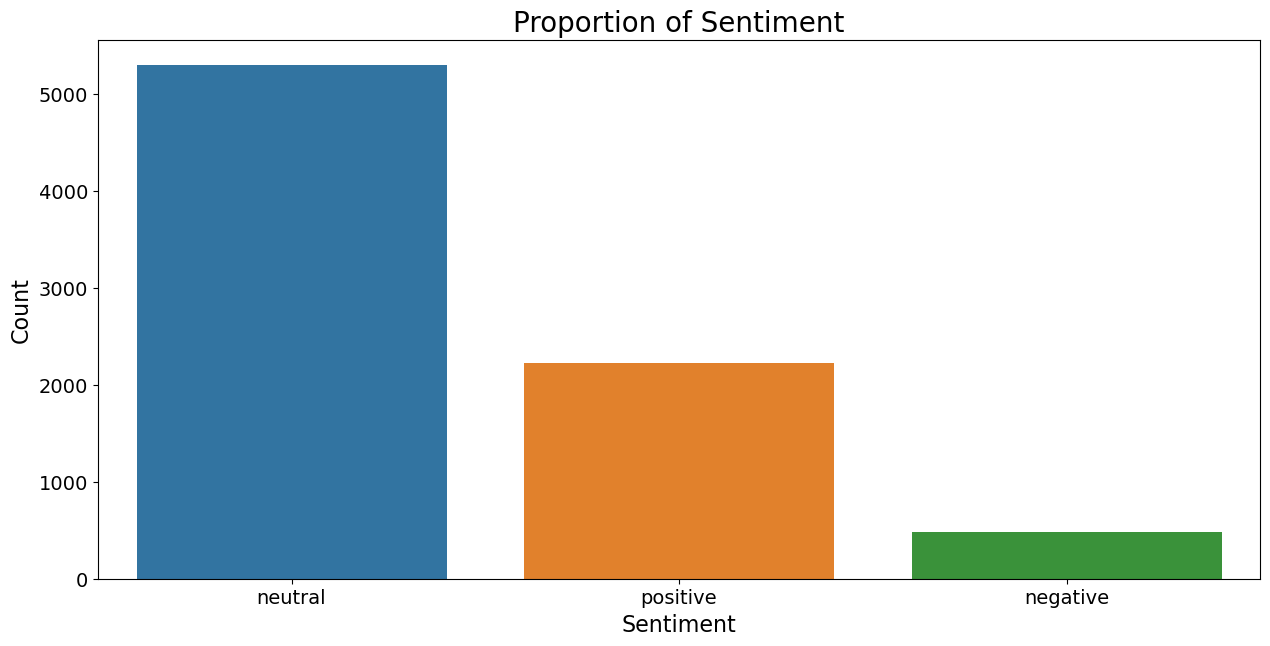

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
ax = sns.barplot(x="sentiment", y='count', data=sentiment_count)

ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=16)  # Reduced font size for x-axis label
ax.set_ylabel('Count', fontsize=16)  # Reduced font size for y-axis label

plt.xticks(fontsize=14)  # Adjust font size of x-axis tick labels
plt.yticks(fontsize=14)  # Adjust font size of y-axis tick labels

plt.show()


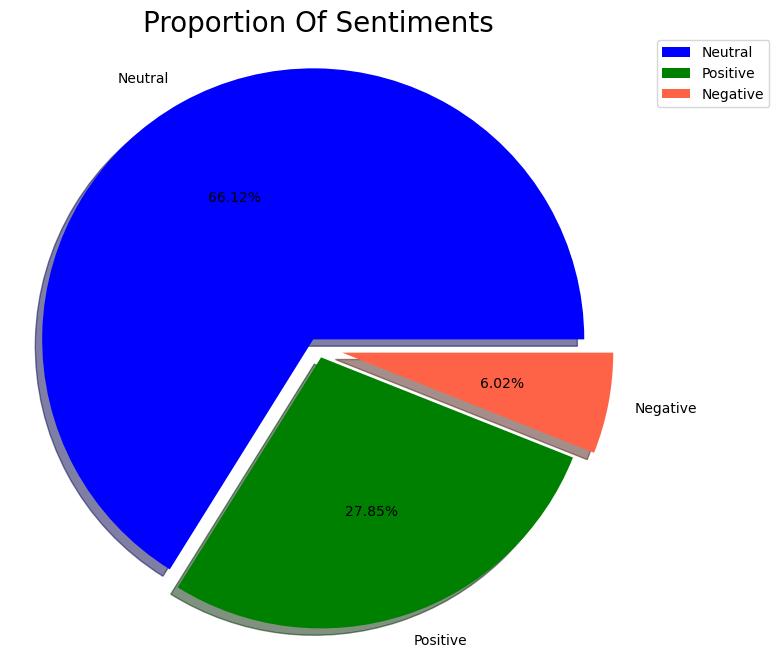

In [31]:
import matplotlib.pyplot as plt

sentiment_count1 = df['sentiment'].value_counts().to_list()
labels = ['Neutral', 'Positive', 'Negative']
colors = ['blue', 'green', 'tomato']  # Assign colors for each sentiment

plt.figure(figsize=(10, 8))
plt.pie(x=sentiment_count1, explode=[0.04, 0.04, 0.1], shadow=True, labels=labels, autopct="%.2f%%", radius=1.1, colors=colors)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


In [32]:
new_df['temp_list'] = new_df['clean_text'].apply(lambda x:str(x).split())

In [33]:
from collections import Counter 
top = Counter([item for sublist in new_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"['rt',",1794
1,"'ai',",653
2,"'would',",532
3,"'new',",471
4,"'learning',",454
5,"'one',",452
6,"'amp',",429
7,"'like',",428
8,"'see',",410
9,"'people',",380


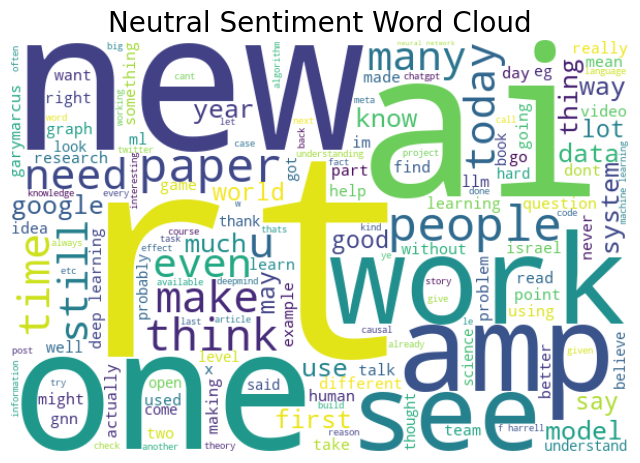

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separating the sentiments for word cloud
neutral = pd.DataFrame(new_df[['stemmed', 'lemmed']][new_df['sentiment'] == 'neutral'])
positive = pd.DataFrame(new_df[['stemmed', 'lemmed']][new_df['sentiment'] == 'positive'])
negative = pd.DataFrame(new_df[['stemmed', 'lemmed']][new_df['sentiment'] == 'negative'])

# Flatten the lists into strings
neutral_text = ' '.join(neutral['lemmed'].explode().astype(str))
positive_text = ' '.join(positive['lemmed'].explode().astype(str))
negative_text = ' '.join(negative['lemmed'].explode().astype(str))


# Create WordClouds for each sentiment
def generate_wordcloud(sentiment_text, title):
    if not sentiment_text:
        print(f"No data available for {title}")
        return
    
    wordcloud = WordCloud(width=600, height=400, background_color='white', max_words=150).generate(sentiment_text)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()
    
generate_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')










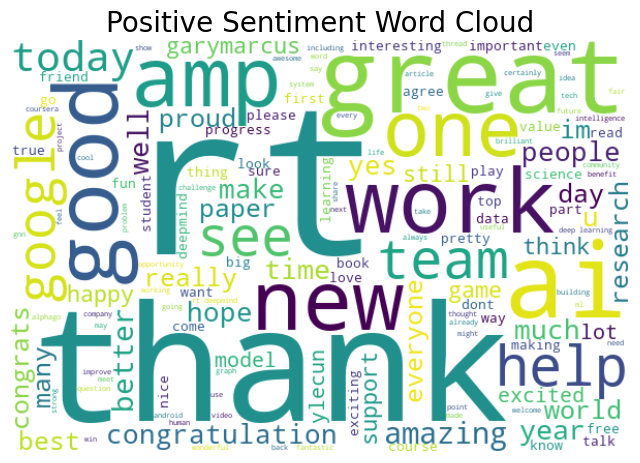

In [35]:
generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud')


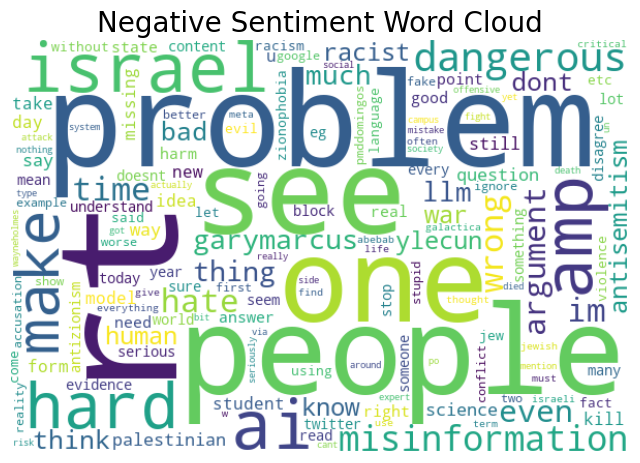

In [36]:
generate_wordcloud(negative_text, 'Negative Sentiment Word Cloud')

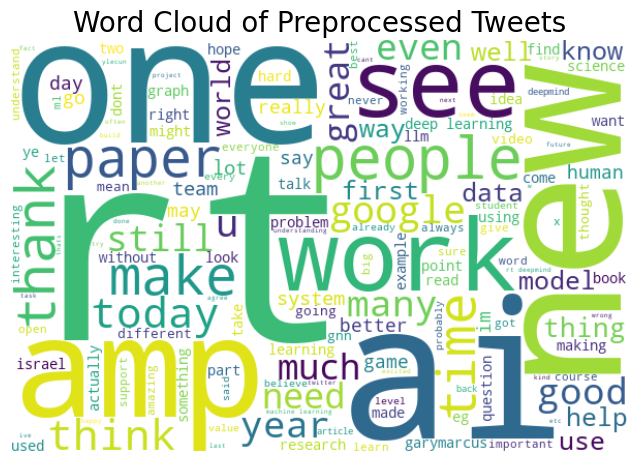

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all preprocessed tweets together
all_tweets_text = ' '.join(new_df['lemmed'].explode().astype(str))

# Create a WordCloud for all tweets
wordcloud = WordCloud(width=600, height=400, background_color='white', max_words=150).generate(all_tweets_text)

# Display the WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Preprocessed Tweets", fontsize=20)
plt.axis('off')
plt.show()


In [38]:
#Assigning dependent and independent features
X= new_df['lemmed']
y=new_df['sentiment']

In [39]:
# Applying Train validation split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [40]:
#checking shape of splitted data
print(X_train.shape)
y_val.shape

(5600,)


(2400,)

In [41]:
#checking splitted data
print(X_train.head())
y_train.head()

4610    [team, pic, celebrate, baiduresearchs, deep, s...
3134    [cyber, elf, occasionally, show, interesting, ...
1600    [rt, crisbodnar, neural, sheaf, diffusion, w, ...
6240    [christophmolnar, gave, clearest, example, sub...
1779    [seanmcbride, pwlot, plinz, lexfridman, thread...
Name: lemmed, dtype: object


4610    positive
3134    positive
1600    positive
6240     neutral
1779     neutral
Name: sentiment, dtype: object

In [42]:
# Apply oversampling to balance classes
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=10)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Convert back to Series
X_train_resampled = X_train_resampled.squeeze()

In [43]:
# Convert the resampled data to a list of strings
X_train_resampled = [' '.join(seq) for seq in X_train_resampled]

In [44]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [45]:
# Bag of words
# Vectorization using CountVectorizer
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
#cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())
cv_X_train = cv.fit_transform(X_train_resampled)







In [46]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
#tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())
tv_X_train=tv.fit_transform(X_train_resampled)

In [47]:
tv_X_train.shape

(11109, 10664)

In [48]:
cv_X_val=cv.transform(X_val.astype(str).str.strip())
tv_X_val=tv.transform(X_val.astype(str).str.strip())

In [49]:



from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target classes
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_val_encoded = label_encoder.transform(y_val)

# Initializing model
xgb_cv = XGBClassifier()

# Fitting the data to the model
xgb_cv.fit(cv_X_train, y_train_encoded)

# Predicted values
pred_xgb_cv = xgb_cv.predict(cv_X_val)


In [50]:
pred_xgb_cv

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [51]:
# Decode the predicted values back to string labels
pred_xgb_cv_labels = label_encoder.inverse_transform(pred_xgb_cv)

# Print the predicted string labels
print(pred_xgb_cv_labels)


['neutral' 'neutral' 'neutral' ... 'positive' 'neutral' 'neutral']


In [52]:
#Create a DataFrame with predicted sentiment for the test data:
validation_prediction_table = pd.DataFrame({'Predicted Sentiment for validation data': pred_xgb_cv_labels})
validation_prediction_table

,Predicted Sentiment for validation data
0,neutral
1,neutral
2,neutral
3,neutral
4,positive
...,...
2395,neutral
2396,neutral
2397,positive
2398,neutral


In [53]:

# Count the occurrences of each sentiment label
sentiment_counts = validation_prediction_table['Predicted Sentiment for validation data'].value_counts()

# Print the counts
print(sentiment_counts)

neutral     1615
positive     637
negative     148
Name: Predicted Sentiment for validation data, dtype: int64


In [54]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_val,pred_xgb_cv_labels))

              precision    recall  f1-score   support

    negative       0.32      0.32      0.32       145
     neutral       0.80      0.82      0.81      1587
    positive       0.65      0.62      0.63       668

    accuracy                           0.73      2400
   macro avg       0.59      0.58      0.59      2400
weighted avg       0.73      0.73      0.73      2400



[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

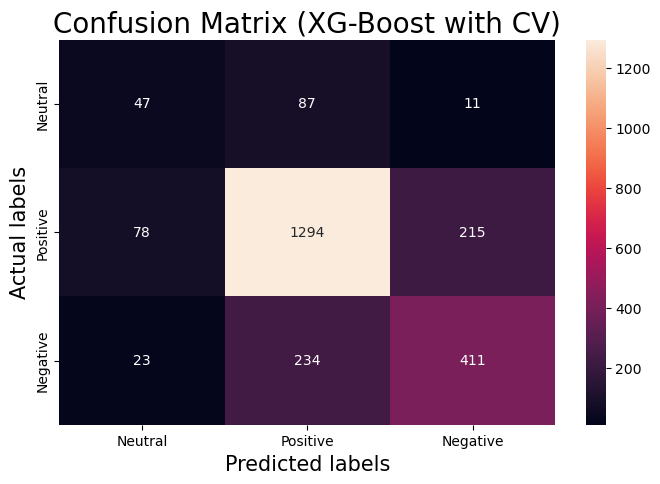

In [55]:
#Plotting Confussion matrix
cf3= (confusion_matrix(y_val,pred_xgb_cv_labels))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG-Boost with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_val_encoded, pred_xgb_cv, average=None)
recall = recall_score(y_val_encoded, pred_xgb_cv, average=None)
f1 = f1_score(y_val_encoded, pred_xgb_cv, average=None)

# Calculate AUC-PR for each class separately
n_classes = len(label_encoder.classes_)
auc_pr = [average_precision_score(y_val_encoded == i, xgb_cv.predict_proba(cv_X_val)[:, i]) for i in range(n_classes)]

# Print the metrics for each class
for i, label in enumerate(label_encoder.classes_):
    print(f"Class: {label}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-Score: {f1[i]:.2f}")
    print(f"AUC-PR: {auc_pr[i]:.2f}")
    print("=" * 40)

# Calculate and print the weighted average metrics
weighted_precision = precision_score(y_val_encoded, pred_xgb_cv, average='weighted')
weighted_recall = recall_score(y_val_encoded, pred_xgb_cv, average='weighted')
weighted_f1 = f1_score(y_val_encoded, pred_xgb_cv, average='weighted')
weighted_auc_pr = sum(auc_pr) / n_classes  # Calculate average AUC-PR

print("Weighted Average Metrics:")
print(f"Weighted Precision: {weighted_precision:.2f}")
print(f"Weighted Recall: {weighted_recall:.2f}")
print(f"Weighted F1-Score: {weighted_f1:.2f}")
print(f"Weighted AUC-PR: {weighted_auc_pr:.2f}")


Class: negative
Precision: 0.32
Recall: 0.32
F1-Score: 0.32
AUC-PR: 0.28
Class: neutral
Precision: 0.80
Recall: 0.82
F1-Score: 0.81
AUC-PR: 0.85
Class: positive
Precision: 0.65
Recall: 0.62
F1-Score: 0.63
AUC-PR: 0.70
Weighted Average Metrics:
Weighted Precision: 0.73
Weighted Recall: 0.73
Weighted F1-Score: 0.73
Weighted AUC-PR: 0.61


In [57]:
# Load the test dataset
test_data = pd.read_csv('D:/4_summersemester2023/1_ML/Slides_exercises_Project/Project_Sentiment Analysis in Twitter/tweets_test_2.csv')

In [58]:
test_data

,id,text,type,author_id,possibly_sensitive,retweet_count,quote_count,reply_count,like_count,followers_count,following_count,tweet_count,listed_count,words
0,1560243169022955521,@hansmriess @mattmcd @Francesco_dgv @_JRowbott...,replied_to,62044012,False,0,0,0,2,33022,3383,5246,359,"['really', 'channel', 'mixing', 'shared', 'acr..."
1,1389618828406149124,@nhaehnle @mattgorecki Much of what I do is op...,replied_to,175624200,False,0,0,4,21,1031629,225,16316,6967,"['much', 'optimization', 'waste', 'care', 'dee..."
2,1428483898896535562,I have been impressed by the number of real wo...,quoted,175624200,False,35,4,25,450,1031629,225,16316,6967,"['impressed', 'number', 'real', 'world', 'econ..."
3,1522256556917764098,@IAmABot10010101 I never got a technical manua...,replied_to,175624200,False,0,0,1,6,1031629,225,16316,6967,"['never', 'got', 'technical', 'manual', 'game'..."
4,1371614359642902528,Somehow my headset has an incompatible version...,tweet,175624200,False,0,0,16,149,1031629,225,16316,6967,"['somehow', 'headset', 'incompatible', 'versio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1374363629441716225,"@Cloud_Strifeeee Yes, writing a tenderer that ...",replied_to,175624200,False,0,0,1,2,1031629,225,16316,6967,"['yes', 'writing', 'tenderer', 'produces', 'st..."
996,1594419109173002241,@artistexyz @LeonDerczynski Find a single inst...,replied_to,48008938,False,0,0,1,1,427851,582,12949,6488,"['find', 'single', 'instance', 'ridiculing', '..."
997,1044290104263491584,We're using AI to create more accurate forecas...,tweet,14130366,False,1260,91,136,5573,5169451,140,1833,8955,"['using', 'ai', 'create', 'accurate', 'forecas..."
998,1321167919645102080,Everyone filters topics through their backgrou...,tweet,175624200,False,19,0,12,377,1031629,225,16316,6967,"['everyone', 'filters', 'topics', 'background'..."


In [59]:
X_test = test_data['text']
X_test

0      @hansmriess @mattmcd @Francesco_dgv @_JRowbott...
1      @nhaehnle @mattgorecki Much of what I do is op...
2      I have been impressed by the number of real wo...
3      @IAmABot10010101 I never got a technical manua...
4      Somehow my headset has an incompatible version...
                             ...                        
995    @Cloud_Strifeeee Yes, writing a tenderer that ...
996    @artistexyz @LeonDerczynski Find a single inst...
997    We're using AI to create more accurate forecas...
998    Everyone filters topics through their backgrou...
999    Happy Easter to all who celebrate around the w...
Name: text, Length: 1000, dtype: object

In [60]:
# Convert to lower case
test_data["text"] = test_data["text"].str.lower()

# Remove punctuations
test_data["clean_text"] = test_data["text"].apply(remove_punctuations)

# Remove stopwords and tokenize
test_data["clean_text"] = test_data["clean_text"].apply(remove_stopwords)

# Apply stemming
test_data["stemmed"] = test_data["clean_text"].apply(stemming)

# Apply lemmatization
test_data["lemmed"] = test_data["clean_text"].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])


In [61]:
# Convert the preprocessed text to a list of strings
X_test = test_data["lemmed"]
X_test = [' '.join(seq) for seq in X_test]

# Vectorize the test data using the same CountVectorizer or TF-IDF vectorizer
cv_X_test = cv.transform(X_test)  # Use cv from your code

In [62]:
# Make predictions using the trained model
pred_xgb_cv_test = xgb_cv.predict(cv_X_test)

# Decode the predicted values back to string labels
pred_xgb_cv_test_labels = label_encoder.inverse_transform(pred_xgb_cv_test)

# Print the predicted string labels for the test set
print(pred_xgb_cv_test_labels)


['neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'negative' 'neutral' 'positive'
 'positive' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'negative'
 'neutral' 'neutral' 'negative' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'positive'
 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'neutral'
 'positive' 'positive' 'neutral' 'neutral' 'positive' 'negative' 'neutral'
 'positive' 'negative' 'neutral' 'neutral' 'positive' 'neutral' 'neutral'
 'positive' 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'positive'
 'positive' 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'neutral'
 'negative' 'neutral' 'positive' 'neutral' 'neutral' 'positive' 'negative'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'positiv

In [63]:
#Create a DataFrame with predicted sentiment for the test data:
test_prediction_table = pd.DataFrame({'Predicted Sentiment for test data': pred_xgb_cv_test_labels})
test_prediction_table

,Predicted Sentiment for test data
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
995,neutral
996,neutral
997,positive
998,neutral


In [64]:


# Count the occurrences of each sentiment label
sentiment_counts = test_prediction_table['Predicted Sentiment for test data'].value_counts()

# Print the counts
print(sentiment_counts)


neutral     679
positive    263
negative     58
Name: Predicted Sentiment for test data, dtype: int64


In [65]:
import os
import numpy as np
team_id = 35
split = "test_2"
output_path = "C:/Users/yamin/Downloads/"

# Saving predictions in npy format
output_file = os.path.join(output_path, f"{team_id}__{split}_clf_pred.npy")
np.save(output_file, pred_xgb_cv_test_labels)
